Group : Adios Romain\
Num : 2187

Students :
- Nelson VICEL--FARAH
- Karen KASPAR
- Antoine ZELLMEYER

In [14]:
from pyspark.sql import SparkSession
spark_application_name = "Spark_Application_Name"
spark = (SparkSession.builder.appName(spark_application_name).getOrCreate())

import warnings
warnings.simplefilter("ignore")

In [5]:
import glob
from pyspark.sql.types import *

schema = StructType([StructField("Date",TimestampType()),
          StructField("High",FloatType()),
          StructField("Low",FloatType()),
          StructField("Open",FloatType()),
          StructField("Close",FloatType()),
          StructField("Volume",FloatType()),
          StructField("Adj Close",FloatType()),
          StructField("company_name",StringType())])

all_dfs = { file.split("/")[1][:-4] : spark.read.schema(schema).csv(file, header=True) for file in glob.glob("stocks_data/*.csv")}

In [6]:
all_dfs

{'GOOGLE': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'AMAZON': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'FACEBOOK': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'APPLE': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'TESLA': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'MICROSOFT': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, company_name: string],
 'ZOOM': DataFrame[Date: timestamp, High: float, Low: float, Open: float, Close: float, Volume: float, Adj Close: float, 

In [7]:
from pyspark.sql.functions import desc


for k, v in all_dfs.items():
    v.show(40)
    v.orderBy(desc("Date")).show(40)

+-------------------+-------+-------+------+-------+---------+---------+------------+
|               Date|   High|    Low|  Open|  Close|   Volume|Adj Close|company_name|
+-------------------+-------+-------+------+-------+---------+---------+------------+
|2017-01-03 00:00:00| 789.63|  775.8|778.81| 786.14|1657300.0|   786.14|      GOOGLE|
|2017-01-04 00:00:00| 791.34| 783.16|788.36|  786.9|1073000.0|    786.9|      GOOGLE|
|2017-01-05 00:00:00| 794.48| 785.02|786.08| 794.02|1335200.0|   794.02|      GOOGLE|
|2017-01-06 00:00:00|  807.9|792.204|795.26| 806.15|1640200.0|   806.15|      GOOGLE|
|2017-01-09 00:00:00|809.966| 802.83| 806.4| 806.65|1274600.0|   806.65|      GOOGLE|
|2017-01-10 00:00:00| 809.13| 803.51|807.86| 804.79|1176800.0|   804.79|      GOOGLE|
|2017-01-11 00:00:00| 808.15| 801.37| 805.0| 807.91|1065900.0|   807.91|      GOOGLE|
|2017-01-12 00:00:00| 807.39| 799.17|807.14| 806.36|1353100.0|   806.36|      GOOGLE|
|2017-01-13 00:00:00|811.224| 806.69|807.48| 807.88|10

+-------------------+-------+-------+-------+---------+---------+---------+------------+
|               Date|   High|    Low|   Open|    Close|   Volume|Adj Close|company_name|
+-------------------+-------+-------+-------+---------+---------+---------+------------+
|2020-12-02 00:00:00|3223.76|3173.26|3221.65|3213.4385|1119593.0|3213.4385|      AMAZON|
|2020-12-01 00:00:00|3248.95|3157.18| 3188.5|  3220.08|4537000.0|  3220.08|      AMAZON|
|2020-11-30 00:00:00|3228.39|3125.55|3208.48|  3168.04|4063900.0|  3168.04|      AMAZON|
|2020-11-27 00:00:00|3216.19|3190.05|3211.26|  3195.34|2392900.0|  3195.34|      AMAZON|
|2020-11-25 00:00:00| 3198.0|3140.26|3141.87|  3185.07|3790400.0|  3185.07|      AMAZON|
|2020-11-24 00:00:00|3134.25|3086.26| 3100.5|  3118.06|3602100.0|  3118.06|      AMAZON|
|2020-11-23 00:00:00|3139.75|3065.46| 3116.7|  3098.39|4708900.0|  3098.39|      AMAZON|
|2020-11-20 00:00:00|3132.89|3098.05|3117.02|   3099.4|3374400.0|   3099.4|      AMAZON|
|2020-11-19 00:00:00|

+-------------------+-------+-------+-------+-------+----------+---------+------------+
|               Date|   High|    Low|   Open|  Close|    Volume|Adj Close|company_name|
+-------------------+-------+-------+-------+-------+----------+---------+------------+
|2017-01-03 00:00:00|29.0825|  28.69|  28.95|29.0375|1.151276E8| 27.27764|       APPLE|
|2017-01-04 00:00:00|29.1275|28.9375|28.9625| 29.005| 8.44724E7|27.247108|       APPLE|
|2017-01-05 00:00:00| 29.215|28.9525|  28.98|29.1525| 8.87744E7|27.385668|       APPLE|
|2017-01-06 00:00:00|  29.54|29.1175| 29.195|29.4775|1.270076E8|27.690971|       APPLE|
|2017-01-09 00:00:00|29.8575| 29.485|29.4875|29.7475|1.342476E8|27.944603|       APPLE|
|2017-01-10 00:00:00| 29.845| 29.575|29.6925|29.7775| 9.78484E7|27.972786|       APPLE|
|2017-01-11 00:00:00|29.9825|  29.65| 29.685|29.9375|1.103544E8|28.123089|       APPLE|
|2017-01-12 00:00:00| 29.825|29.5525| 29.725|29.8125|1.083448E8|28.005665|       APPLE|
|2017-01-13 00:00:00| 29.905|29.

+-------------------+-------+------+------+-------+---------+---------+------------+
|               Date|   High|   Low|  Open|  Close|   Volume|Adj Close|company_name|
+-------------------+-------+------+------+-------+---------+---------+------------+
|2020-12-02 00:00:00|215.085| 212.8|214.88|214.127|6486678.0|  214.127|   MICROSOFT|
|2020-12-01 00:00:00| 217.32|213.35|214.51| 216.21|3.09045E7|   216.21|   MICROSOFT|
|2020-11-30 00:00:00| 214.76|210.84| 214.1| 214.07|3.30648E7|   214.07|   MICROSOFT|
|2020-11-27 00:00:00| 216.27|214.04|214.85| 215.23|1.45122E7|   215.23|   MICROSOFT|
|2020-11-25 00:00:00| 215.29|212.46|215.11| 213.87|2.10129E7|   213.87|   MICROSOFT|
|2020-11-24 00:00:00| 214.25|208.86|209.59| 213.86|3.39797E7|   213.86|   MICROSOFT|
|2020-11-23 00:00:00| 212.29|208.16|210.95| 210.11|2.56835E7|   210.11|   MICROSOFT|
|2020-11-20 00:00:00| 213.29| 210.0| 212.2| 210.39|2.28291E7|   210.39|   MICROSOFT|
|2020-11-19 00:00:00| 213.03|209.93|211.38| 212.42|2.47927E7|   2

In [8]:
for k, v in all_dfs.items():
    print(k, "has", v.count(), "rows")

GOOGLE has 987 rows
AMAZON has 987 rows
FACEBOOK has 987 rows
APPLE has 987 rows
TESLA has 987 rows
MICROSOFT has 987 rows
ZOOM has 411 rows


In [9]:
from pyspark.sql.functions import *

def day_period(d1, d2):
    return datediff(d1, d2)

In [10]:
for k, v in all_dfs.items():
    v.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------+
|summary|              High|               Low|              Open|             Close|            Volume|         Adj Close|company_name|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------+
|  count|               987|               987|               987|               987|               987|               987|         987|
|   mean|1175.6790605137292|1152.9178970166856|1163.8854444324065|1164.8144006854736|1634631.7335359675|1164.8144006854736|        null|
| stddev| 218.8235632110295| 212.2207173542823|214.97779187990264|215.44599608390612| 716425.6760312195|215.44599608390612|        null|
|    min|            789.63|             775.8|            778.81|            786.14|          285821.0|            786.14|      GOOGLE|
|    max|           1824.83|         1789

In [11]:
for k, v in all_dfs.items():
    for colonne in v.columns:
        if colonne not in ["Date", "company_name"]:
            v.select([count(when(isnan(col(colonne)) | col(colonne).isNull() , True)).alias(k + " " + colonne)]).show()

+-----------+
|GOOGLE High|
+-----------+
|          0|
+-----------+

+----------+
|GOOGLE Low|
+----------+
|         0|
+----------+

+-----------+
|GOOGLE Open|
+-----------+
|          0|
+-----------+

+------------+
|GOOGLE Close|
+------------+
|           0|
+------------+

+-------------+
|GOOGLE Volume|
+-------------+
|            0|
+-------------+

+----------------+
|GOOGLE Adj Close|
+----------------+
|               0|
+----------------+

+-----------+
|AMAZON High|
+-----------+
|          0|
+-----------+

+----------+
|AMAZON Low|
+----------+
|         0|
+----------+

+-----------+
|AMAZON Open|
+-----------+
|          0|
+-----------+

+------------+
|AMAZON Close|
+------------+
|           0|
+------------+

+-------------+
|AMAZON Volume|
+-------------+
|            0|
+-------------+

+----------------+
|AMAZON Adj Close|
+----------------+
|               0|
+----------------+

+-------------+
|FACEBOOK High|
+-------------+
|            0|
+-------------

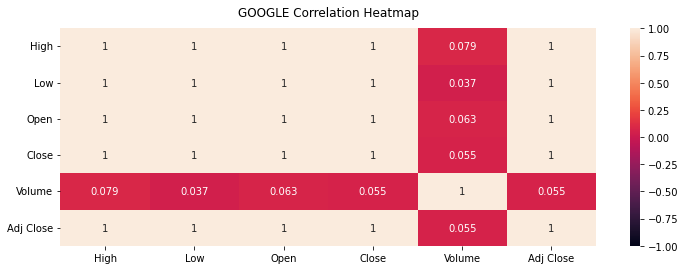

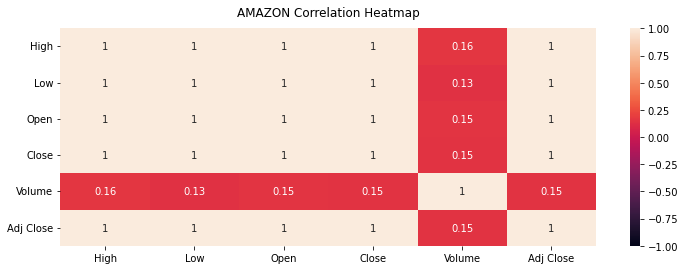

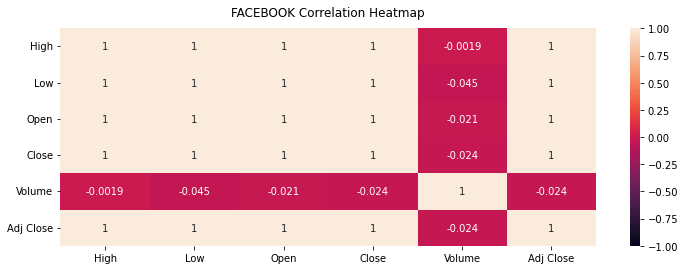

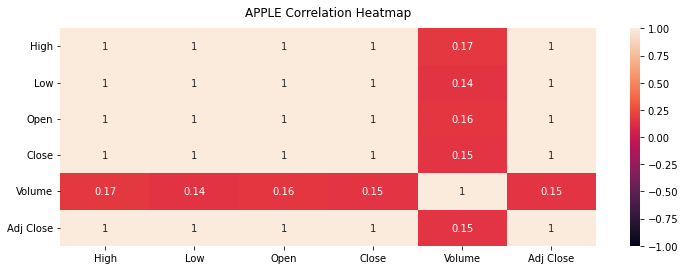

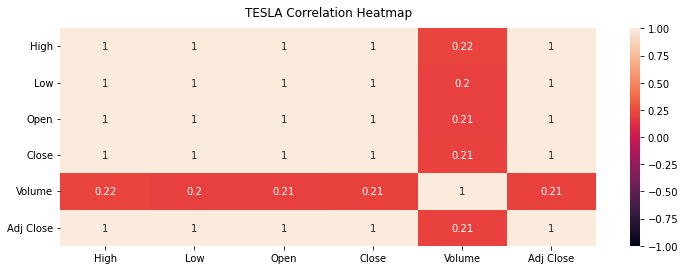

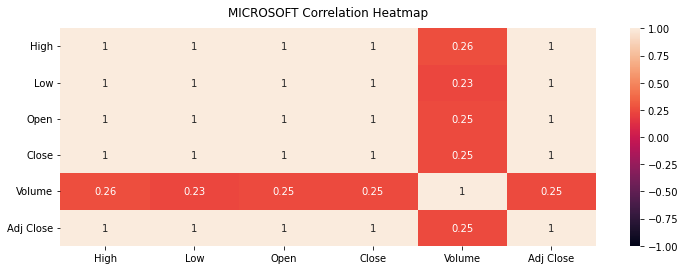

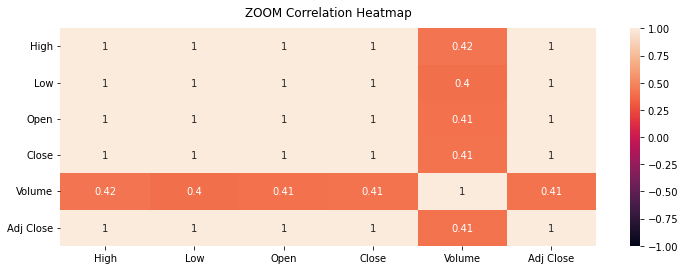

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for k, v in all_dfs.items():
    df = v.to_pandas_on_spark().drop(["company_name","Date"], axis=1)
    plt.figure(figsize=(12, 4))
    heatmap = sns.heatmap(df.corr().to_pandas(), vmin=-1, vmax=1, annot=True)
    heatmap.set_title(k + " Correlation Heatmap", fontdict={'fontsize':12}, pad=12)